In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

In [3]:
dirt = "C:/Users/Xing/Desktop/ML/D4/"
mush = pd.read_csv(dirt + 'mush.csv')

In [12]:
mush.head()


,edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [14]:
mush.describe()

,edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [15]:
mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
edible                      8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [16]:
mush.dtypes

edible                      object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [4]:
mush.dropna(inplace=True)
mush['edible']=mush['edible'].astype('category')
mush['cap-shape']=mush['cap-shape'].astype('category')
mush['cap-surface']=mush['cap-surface'].astype('category')
mush['cap-color']=mush['cap-color'].astype('category')
mush['bruises']=mush['bruises'].astype('category')
mush['odor']=mush['odor'].astype('category')

mush['gill-attachment']=mush['gill-attachment'].astype('category')
mush['gill-spacing']=mush['gill-spacing'].astype('category')
mush['gill-size']=mush['gill-size'].astype('category')
mush['gill-color']=mush['gill-color'].astype('category')
mush['stalk-shape']=mush['stalk-shape'].astype('category')
mush['stalk-root']=mush['stalk-root'].astype('category')
mush['stalk-surface-above-ring']=mush['stalk-surface-above-ring'].astype('category')
mush['stalk-surface-below-ring']=mush['stalk-surface-below-ring'].astype('category')
mush['stalk-color-above-ring']=mush['stalk-color-above-ring'].astype('category')
mush['stalk-color-below-ring']=mush['stalk-color-below-ring'].astype('category')
mush['veil-type']=mush['veil-type'].astype('category')
mush['veil-color']=mush['veil-color'].astype('category')
mush['ring-number']=mush['ring-number'].astype('category')

mush['ring-type']=mush['ring-type'].astype('category')
mush['spore-print-color']=mush['spore-print-color'].astype('category')
mush['population']=mush['population'].astype('category')
mush['habitat']=mush['habitat'].astype('category')

In [22]:
mush.dtypes

edible                      category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [25]:
mush.describe()

,edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [26]:
mush.shape

(8124, 23)

In [5]:
Xcols=['cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color',
       'stalk-shape','stalk-root','stalk-surface-above-ring',
       'stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number',
       'ring-type','spore-print-color','population','habitat']
Ycol = ['edible']
Xcols=mush[Xcols]
Xcols=pd.get_dummies(Xcols)
Xcols.dtypes


cap-shape_b            uint8
cap-shape_c            uint8
cap-shape_f            uint8
cap-shape_k            uint8
cap-shape_s            uint8
cap-shape_x            uint8
cap-surface_f          uint8
cap-surface_g          uint8
cap-surface_s          uint8
cap-surface_y          uint8
cap-color_b            uint8
cap-color_c            uint8
cap-color_e            uint8
cap-color_g            uint8
cap-color_n            uint8
cap-color_p            uint8
cap-color_r            uint8
cap-color_u            uint8
cap-color_w            uint8
cap-color_y            uint8
bruises_f              uint8
bruises_t              uint8
odor_a                 uint8
odor_c                 uint8
odor_f                 uint8
odor_l                 uint8
odor_m                 uint8
odor_n                 uint8
odor_p                 uint8
odor_s                 uint8
                       ...  
ring-number_n          uint8
ring-number_o          uint8
ring-number_t          uint8
ring-type_e   

In [6]:
Y=mush[Ycol]

In [7]:
X = pd.concat([Xcols], axis=1)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [9]:
feature_names=X.columns
print (feature_names)

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=117)


In [10]:
from sklearn import metrics
mush_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=9)
mush_tree.fit(X_train, Y_train)
predictions = mush_tree.predict(X_test)
print(metrics.confusion_matrix(Y_test, predictions))
print("Accuracy Score =", metrics.accuracy_score(Y_test, predictions))


[[1044    0]
 [   2  985]]
Accuracy Score = 0.999015263417036


In [12]:
from sklearn.ensemble import AdaBoostClassifier

In [13]:
ada_mush = AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=10),
                               n_estimators=300, algorithm="SAMME.R", learning_rate=0.5)

ada_mush.fit(X_train, Y_train)
pred2 = ada_mush.predict(X_test)
print(metrics.confusion_matrix(Y_test, pred2))
print("Accuracy Score =", metrics.accuracy_score(Y_test, pred2))

[[1044    0]
 [   0  987]]
Accuracy Score = 1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
###### 10-fold cross-validation ###################
from sklearn.model_selection import cross_val_score
cross_val_score(ada_mush, X_train, Y_train, cv=5, scoring = "accuracy")


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

array([1., 1., 1., 1., 1.])

In [53]:
from sklearn.tree import export_graphviz

## Decision Tree Visualization
export_graphviz(
   mush_tree,
   out_file=dirt+"tree_mush.dot",
   feature_names=feature_names,
   class_names=('0','1'),
   rounded=True,
   filled=True)



Feature ranking:
1. feature 33 (0.458726)
2. feature 3 (0.226848)
3. feature 2 (0.180531)
4. feature 0 (0.056100)
5. feature 4 (0.038315)
6. feature 5 (0.034311)
7. feature 12 (0.005169)
8. feature 31 (0.000000)
9. feature 32 (0.000000)
10. feature 41 (0.000000)
11. feature 34 (0.000000)
12. feature 35 (0.000000)
13. feature 36 (0.000000)
14. feature 37 (0.000000)
15. feature 38 (0.000000)
16. feature 39 (0.000000)
17. feature 40 (0.000000)
18. feature 44 (0.000000)
19. feature 42 (0.000000)
20. feature 43 (0.000000)
21. feature 29 (0.000000)
22. feature 45 (0.000000)
23. feature 46 (0.000000)
24. feature 47 (0.000000)
25. feature 48 (0.000000)
26. feature 49 (0.000000)
27. feature 50 (0.000000)
28. feature 51 (0.000000)
29. feature 30 (0.000000)
30. feature 26 (0.000000)
31. feature 28 (0.000000)
32. feature 27 (0.000000)
33. feature 1 (0.000000)
34. feature 6 (0.000000)
35. feature 7 (0.000000)
36. feature 8 (0.000000)
37. feature 9 (0.000000)
38. feature 10 (0.000000)
39. feature 11

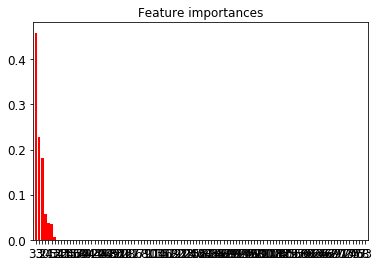

In [58]:
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')
importances = adult_tree.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances 
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()
